In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('E:\Datasets\P74-Project-1\Car_Purchasing_Data.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
df = df.drop(['Customer Name', 'Customer e-mail'], axis =1)

In [5]:
df.head()

,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df = df.drop('Country', axis =1)

In [7]:
X = df[['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']]
y = df[['Car Purchase Amount']]

In [8]:
X.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [9]:
y.head()

,Car Purchase Amount
0,35321.45877
1,45115.52566
2,42925.70921
3,67422.36313
4,55915.46248


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
X_sca = scaler.fit_transform(X)
y_sca = scaler.fit_transform(y)

In [12]:
X_sca.shape

(500, 5)

In [13]:
y_sca.shape

(500, 1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sca, y_sca, test_size = 0.2)

In [15]:
X_train.shape

(400, 5)

In [16]:
X_train

array([[0.        , 0.71260634, 0.51735784, 0.71206067, 0.32825708],
       [1.        , 0.59231537, 0.85365915, 0.53764513, 0.36567137],
       [1.        , 0.73649786, 0.60624815, 0.70751118, 0.4168218 ],
       ...,
       [0.        , 0.5699303 , 0.60380591, 0.47070327, 0.40849191],
       [0.        , 0.47252127, 0.78216264, 0.08025074, 0.55367864],
       [1.        , 0.37217703, 0.49146171, 0.61288149, 0.50082793]])

In [17]:
import tensorflow.keras 
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(11, input_dim = 5, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                66        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 84        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 158
Trainable params: 158
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
epochs_hist = model.fit(X_train, y_train, epochs = 40, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/40
7/7 [==============================] - 40s 230ms/step - loss: 0.2018 - val_loss: 0.1818
Epoch 2/40
7/7 [==============================] - 0s 12ms/step - loss: 0.1791 - val_loss: 0.1410
Epoch 3/40
7/7 [==============================] - 0s 12ms/step - loss: 0.1443 - val_loss: 0.1077
Epoch 4/40
7/7 [==============================] - 0s 13ms/step - loss: 0.1110 - val_loss: 0.0802
Epoch 5/40
7/7 [==============================] - 0s 12ms/step - loss: 0.0898 - val_loss: 0.0595
Epoch 6/40
7/7 [==============================] - 0s 12ms/step - loss: 0.0654 - val_loss: 0.0457
Epoch 7/40
7/7 [==============================] - 0s 13ms/step - loss: 0.0479 - val_loss: 0.0382
Epoch 8/40
7/7 [==============================] - 0s 12ms/step - loss: 0.0373 - val_loss: 0.0333
Epoch 9/40
7/7 [==============================] - 0s 9ms/step - loss: 0.0316 - val_loss: 0.0277
Epoch 10/40
7/7 [==============================] - 0s 8ms/step - loss: 0.0249 - val_loss: 0.0227
Epoch 11/40
7/7 [============

model

In [22]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

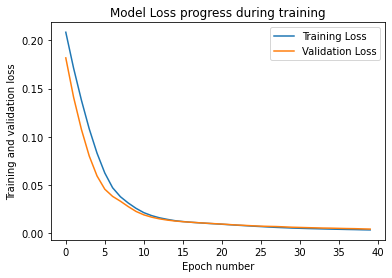

In [26]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss progress during training')
plt.ylabel('Training and validation loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

In [31]:
test_1 = np.array([[1, 70, 80000, 10000, 90000]])
pred_1 = model.predict(test_1)
print('Purchase amt', pred_1)

Purchase amt [[24477.]]
